# Data Science 1 '22/'23

## Numerical Analysis & Signal Analysis - Fourier Analysis

### Introduction

Signals that (more or less) repeat over regular intervals are called ([quasi](https://en.wikipedia.org/wiki/Quasiperiodicity)-)[periodic](https://en.wikipedia.org/wiki/Periodic_function). In the the life sciences, (quasi-)periodic signals are quite common. E.g.:

* [Neural](https://en.wikipedia.org/wiki/Neural_oscillation) oscillations or brain waves

* [Glycolytic](https://en.wikipedia.org/wiki/Glycolytic_oscillation) oscillations

* [Cardiac](https://en.wikipedia.org/wiki/Cardiac_cycle) and [respiratory](https://en.wikipedia.org/wiki/Respiratory_rate) cycles

* [Cell](https://en.wikipedia.org/wiki/Cell_cycle) cycles

* Diurnal [blood glucose](https://en.wikipedia.org/wiki/Blood_sugar_level) variations

* Sleep/wake cycles and other [circadian](https://en.wikipedia.org/wiki/Circadian_rhythm) rhythms

* [Menstrual](https://en.wikipedia.org/wiki/Menstrual_cycle) hormone cycles

* [Phenological](https://en.wikipedia.org/wiki/Phenology) processes across seasons

* [Population](https://en.wikipedia.org/wiki/Population_dynamics) dynamics

An interval over which the signal repeats once is called a *cycle*. Its duration $T$ is called the *period*. The density of cycles (per unit of time) is called the signal *frequency* $f$.

$$
f = \frac{1}{T}
$$

In practice, signals are typically acquired over a finite duration. Therefore, *any* signal of total duration $T$ can be treated as if it were part of a periodic signal with a period $T$. As a result, all analysis tools that are useful for periodic signals can also be applied to other signals of finite extent.

### Sinusoidal regression

The most typical function in mathematics that describes a periodic signal is the cosine (or, alternatively, the sine) waveform. It is "simple" in the sense that its derivatives are sinusoidal functions as well. If we include a constant offset, the form of the function is

$$
y(x) = C + A \cdot \cos( 2 \pi f \cdot x - \varphi)
$$

Here,

* $C$ represents an *offset* or *bias* in the signal, equal to the equilibrium point around which the wave oscillates;

* $A$ indicates the *amplitude* of the wave, equal to the maximal deviation from the equilibrium position;

* $\varphi$ denotes the *phase* of the wave, where $\varphi=0$ means the wave starts like a cosine with maximal amplitude but zero velocity, $\varphi=\frac{\pi}{2}$ means the wave starts like a sine with zero amplitude but maximal velocity, etcetera.

Henceforth, we will assume that the frequency of the signal $f$ is known, but the values of the parameters $C$, $A$ and $\varphi$ are to be determined by fitting the above function to the data $(x_i, y_i)$.

<div>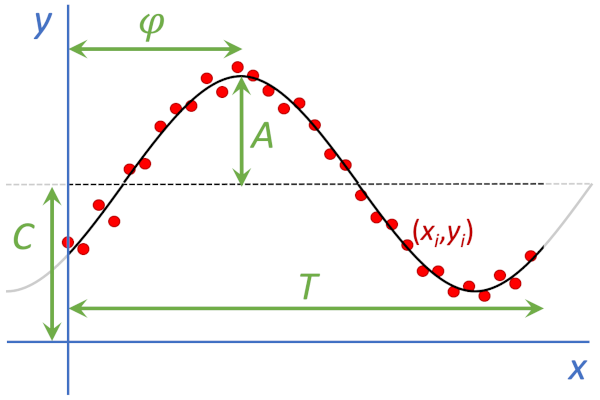</div>

For simplicity, we assume that datapoints are sampled regularly such that all neighboring $x_i$ are equidistant, starting at $x_0=0$. We shall also assume that the duration of the signal corresponds with precisely one period $T$. In other words, if the signal is sampled $n$ times, then $x_i = i \cdot \frac{T}{n}$.

The above formula for $y(x)$ has the disadvantage that it is not suitable for linear regression because the unknown parameter $\varphi$ is not a coefficient of a term but occurs inside the cosine function. However, by using the trigonometric identity $\cos(\alpha-\beta) = \cos(\alpha)\cos(\beta)+\sin(\alpha)\sin(\beta)$ we may obtain

$$
y(x) = a_0 + a_1 \cdot \cos( 2 \pi f \cdot x) + b_1 \cdot \sin( 2 \pi f \cdot x)
$$

where

* $a_0 = C$

* $a_1 = A \cos(\varphi)$

* $b_1 = A \sin(\varphi)$

or, conversely,

* $C = a_0$

* $A^2 = a_1^2 + b_1^2$

* $\tan(\varphi) = \frac{b_1}{a_1}$

In matrix form, this equality can be denoted as

$$
\left[ \begin{array}{ccc}
1 & \cos(2 \pi \frac{x_0}{T}) & \sin(2 \pi \frac{x_0}{T}) \\
1 & \cos(2 \pi \frac{x_1}{T}) & \sin(2 \pi \frac{x_1}{T}) \\
\vdots & \vdots & \vdots \\
1 & \cos(2 \pi \frac{x_{n-1}}{T}) & \sin(2 \pi \frac{x_{n-1}}{T})
\end{array} \right] \left[ \begin{array}{c}
a_0\\
a_1\\
b_1
\end{array} \right] = \left[ \begin{array}{c}
y_0\\
y_1\\
\vdots\\
y_{n-1}
\end{array} \right]
$$

This is a standard linear regression equation of the form $\boldsymbol{X}\boldsymbol{a}=\boldsymbol{y}$. Because the matrix $\boldsymbol{X}$ is not square, we cannot directly invert this, but by pre-multiplying with $\boldsymbol{X}^\text{T}$ we get $\boldsymbol{X}^\text{T}\boldsymbol{X}\boldsymbol{a}=\boldsymbol{X}^\text{T}\boldsymbol{y}$ which has a solution $\boldsymbol{a}=(\boldsymbol{X}^\text{T}\boldsymbol{X})^{-1}(\boldsymbol{X}^\text{T}\boldsymbol{y})$.

Because of the phase difference between a sine and a cosine in combination with the equidistant nature of the data points, the matrix $\boldsymbol{X}$ turns out to have a very special form: all columns are orthogonal! As a result, the Gram matrix $\boldsymbol{X}^\text{T}\boldsymbol{X}$ equals

$$
\boldsymbol{X}^\text{T}\boldsymbol{X} = \left[ \begin{array}{ccc}
n & 0 & 0 \\
0 & \frac{n}{2} & 0 \\
0 & 0 & \frac{n}{2}
\end{array} \right]
$$

and its inverse

$$
(\boldsymbol{X}^\text{T}\boldsymbol{X})^{-1} = \frac{1}{n} \left[ \begin{array}{ccc}
1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2
\end{array} \right]
$$

Plugging this all in, we arrive at explicit solutions

$$
\begin{align}
a_0 &= \frac{1}{n} \sum_i y_i
\\
a_1 &= \frac{2}{n} \sum_i \cos(2 \pi \frac{x_i}{T}) \cdot y_i
\\
b_1 &= \frac{2}{n} \sum_i \sin(2 \pi \frac{x_i}{T}) \cdot y_i
\end{align}
$$

**Exercise 1**

Write a function `sinusoidal()` that fits a single period of a sinusoidal function through a series of equidistant data points that are specified in a list `ydata`, and determines the coefficients $a_0$, $a_1$, and $b_1$. Alternatively, if the user provides an argument `polar=True` then the function should return values for the parameters $C$, $A$, and $\varphi$.

In [17]:
from math import cos, sin, pi, hypot, atan2
import numpy as np
def sinusoidal(ydata, polar=False):
    """p1, p2, p3 = sinusoidal(ydata, polar=False).
    Sinusoidal regression method that fits a single sinusoidal
    period through data {ydata}. If polar=False, coefficients
    {a0,a1,b1} are returned; if polar=True, parameter values
    {C,A,phi} are returned.
    ydata  = {y0,y1,...,yn}
    polar  = type of return values (default False)
    """
    n = len(ydata)
    a0 = a1=b1=0.0
    for i,yi in enumerate (ydata):
        a0 += ydata[i]
        a1 += cos(2*pi*i/n)*yi
        b1 += sin(2*pi*i/n)*yi

    a0 /= n
    a1 *= (2/n)
    b1 *= (2/n)
    if polar:

        return a0,hypot(a1,b1), atan2(b1,a1)
    else:
        return a0,a1,b1

We apply the method to a series of $n$ points that follow one period of a sawtooth wave.

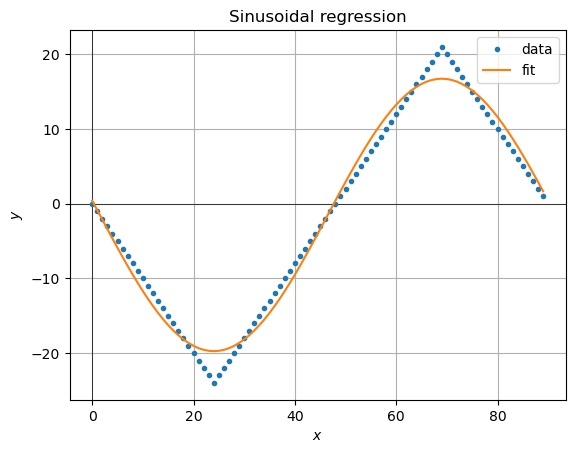

In [18]:
# Example: Sinusoidal fit through n points from sawtooth wave
n = 90
xs = list(range(n))

from random import randint
shiftx = randint(0, n)
shifty = randint(-n // 2, 0)
ydata = [abs((x - shiftx) % n - (n / 2)) + shifty for x in xs]

C, A, phi = sinusoidal(ydata, polar=True)
ys = [C + A * cos(2 * pi * x / n - phi) for x in xs]

%matplotlib inline
import matplotlib.pyplot as plt
plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xs, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='fit')
plt.title('Sinusoidal regression'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.grid(True); plt.legend(); plt.show()

### Fourier transform

[Fourier's theorem](https://en.wikipedia.org/wiki/Fourier_series) states that *any* signal can be written as the sum of sinusoidal functions with suitable amplitudes and phases. In general, it may be necessary to add an large number of sinusoids to approximate the signal arbitrarily closely. This property holds even for non-periodic signals (which can be regarded as periodic signals with a period that happens to be infinitely large). The amplitudes $A_j$ and phases $\varphi_j$ of the sinusoids that make up the signal are called the signal's [spectrum](https://en.wikipedia.org/wiki/Spectral_density).

![Fourier decomposition of a square wave](https://upload.wikimedia.org/wikipedia/commons/2/2b/Fourier_series_and_transform.gif)

For example, in the animation above, sinusoidal waves are added together to construct a periodic square wave. At the discontinuities in the square wave function, some oscillations and overshoots are visible. This is called the [Gibbs-phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon) (similar to the Runge-phenomenon for polynomial interpolation). The extent of this ringing can be reduced by increasing the number of wave components that are added together.

For a finite discrete signal that is specified in the form of a list of $n$ equidistant samples $(x_i,y_i)$, a finite number of sinusoidal terms need to be added to describe the signal exactly. The explicit form of the summation depends on whether the number of data points is odd or even.

* For odd $n$:

$$
y(x) = \sum_{i=0}^{(n-1)/2} a_i \cdot \cos \left( 2 \pi i \frac{x}{T} \right) + \sum_{i=1}^{(n-1)/2} b_i \cdot \sin \left( 2 \pi i \frac{x}{T} \right)
$$

* For even $n$:

$$
y(x) = \sum_{i=0}^{n/2} a_i \cdot \cos \left( 2 \pi i \frac{x}{T} \right) + \sum_{i=1}^{n/2-1} b_i \cdot \sin \left( 2 \pi i \frac{x}{T} \right)
$$

Note that the term involving $a_0$ contributes a constant offset since it is multiplied with $\cos(0)=1$. Also, a term involving a $b_0$ can be imagined to be included, but since it is multiplied by $\sin(0)=0$ it does not contribute; for that reason the sum involving sine functions may start at $i=1$. Similarly, in the even case, the upper summation limit $i=n/2$ contributes an oscillating term that equals $\pm 1$ to the cosine sum, or again a zero contribution to the sine sum. In either case, verify that there are $n$ relevant coefficients in total, the same number as the number of data points.

The summations involve sinusoids with frequencies that run from $f=0$ to $f=\frac{n}{2T}$. This upper bound is called the [Nyquist-frequency](https://en.wikipedia.org/wiki/Nyquist_frequency)

$$
f_\text{Ny} = \frac{1}{2 h} = \frac{1}{2} f_s
$$

where $h$ is the sampling interval ($h=\frac{T}{n}$) and $f_s$ is the sampling frequency ($f_s=\frac{1}{h}=\frac{n}{T}$). This is an important characteristic because it denotes the highest frequency that can reliably be sampled. If one is interested in sampling a biological signal with particular content of interest at certain frequencies, this means that one should sample that signal at least twice as fast! For example, in order to be able to detect a heart beat with frequencies up to - say - 150 beats per minute, one has to sample at least 300 times per second (i.e. $f_s \ge 5$ Hz).

The value of the coefficients $a_i$ and $b_i$ can be determined by a procedure that is completely analogous to the sinusoidal regression model. The difference will be that the design matrix $\boldsymbol{X}$ will contain a total of $n$ columns. All of these again turn out to be orthogonal, allowing $(\boldsymbol{X}^\text{T}\boldsymbol{X})^{-1}$ to be derived explicitly. Altogether, we find

$$
\begin{align}
a_0 &= \frac{1}{n} \sum_i y_i
\\
a_j &= \frac{2}{n} \sum_i \cos(2 \pi j \frac{x_i}{T}) \cdot y_i
\\
a_{n/2} &= \frac{1}{n} \sum_i \cos(n \pi \frac{x_i}{T}) \cdot y_i
\\
b_j &= \frac{2}{n} \sum_i \sin(2 \pi j \frac{x_i}{T}) \cdot y_i
\end{align}
$$

Note that the third formula involving $a_{n/2}$ only applies to the case where the number of data points is even. In the second equation, the index $i$ is assumed to exclude the special cases $i=0$ and $i=n/2$.

The operation that computes the coefficients $a_i$ and $b_i$ from a given signal is called the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform). There are various variations of the method, depending on whether it is applied to discrete or continuous signals of finite or infinite extent, and whether it is expressed in real-valued numbers or complex-valued numbers (involving $\sqrt{-1}$). Our approach relates to the *real-valued* [discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform).

**Exercise 2**

Complete the below function `fourier()` that performs the Fourier transform to a series of data in a list `ydata`, and returns lists `a` and `b` with the coefficients of the cosine- and sine-terms. Make both lists of coefficients start at index zero and be of equal length (i.e. include `b[0] = 0.0`), and take care that your function correctly handles odd as well as even numbers of data points.

In [19]:
from math import pi, sin, cos
def fourier(ydata):
    """a, b = fourier(ydata).
    Performs the real-valued discrete Fourier transform
    on a signal given in ydata. Lists of coefficients a
    and b are returned.
    ydata  = {y0,y1,...,yn}
    """
    n = len(ydata)
    #number of elements in a & b
    m = n//2 +1
    a = []
    b=[]
    #xi = i*h
    #h = T/n

    for index in range (m):

        aj = 2/n*sum(cos(2* pi*index*i/n)* yi for i,yi in enumerate (ydata))
        a.append(aj)
        bj = 2/n*sum(sin(2* pi*index*i/n)* yi for i,yi in enumerate (ydata))
        b.append(bj)

    #for special case above
    a[0]/= 2.0
    if n%2==0:
        a[-1]/=2.0
        
    return a, b
    #a and b are lists of all a and all b 

**Exercise 3**

Also implement the inverse Fourier transform `ifourier()` that reconstructs the data `ydata` from the coefficients `a` and `b`. An optional argument `n` indicates the length of the original data series, since the information whether the original signal was of odd or even length is otherwise lost (if `n` is not provided by the user, make a reasonable estimate yourself based on the lengths of `a` and `b`).

In [20]:
def ifourier(a, b, n=None):
    """y = ifourier(a, b, n=None).
    Performs the inverse real-valued discrete Fourier
    transform to reconstruct a signal y of length n
    from lists of coefficients a and b.
    a  = {a0,a1,...,am}
    b  = {b0,b1,...,bm}
    n  = desired length (default auto)
    """
    m = len(a)
    if len(b) != m:
        raise ValueError('Data of unequal length')

    if n is None:
        if abs(b[-1]) < 1e-12:
            n = 2* (m -1) #m=3 -> n=4 
        else:
            n = 2*m -1 
    y = []
    #m is about a and b
    #n is about y
    for index in range (n) :
        yi = sum(ai*cos (2 * pi * i * index / n) for i,ai in enumerate (a))
        yi += sum(bi*sin(2 * pi * i * index / n)for i, bi in enumerate (b))
        y.append(yi)
    return y

We again apply the method to a series of $n$ points that follow one period of a sawtooth wave.

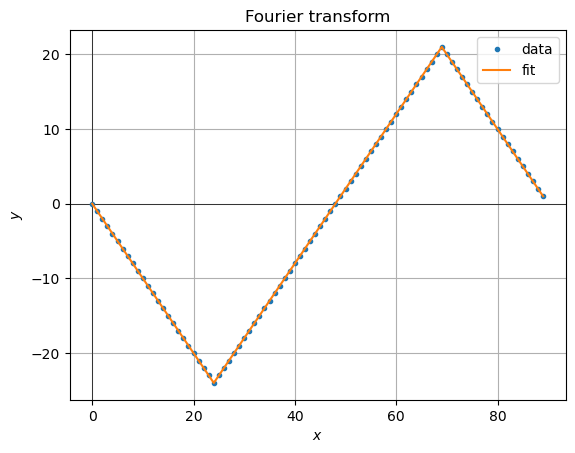

In [21]:
# Example: Sinusoidal fit through n points from sawtooth wave
a, b = fourier(ydata)
ys = ifourier(a, b, len(ydata))

plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.plot(xs, ydata, '.', label='data')
plt.plot(xs, ys, '-', label='fit')
plt.title('Fourier transform'); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.grid(True); plt.legend(); plt.show()

We can now also show the *amplitude spectrum* which plots the amplitude $A_j = \sqrt{a_j^2+b_j^2}$ of each frequency component. (Similarly, the *power spectrum* plots their squares $A_j^2 = a_j^2+b_j^2$.) On the horizontal axis, the frequency is plotted, expressed in "number of cycles per signal duration"; if the signal duration is known, this can be converted to "cycles per unit of time" (like "cycles per second", i.e. "Hertz").

Verify for yourself that all frequency components are at frequencies that do not exceed the Nyquist frequency.

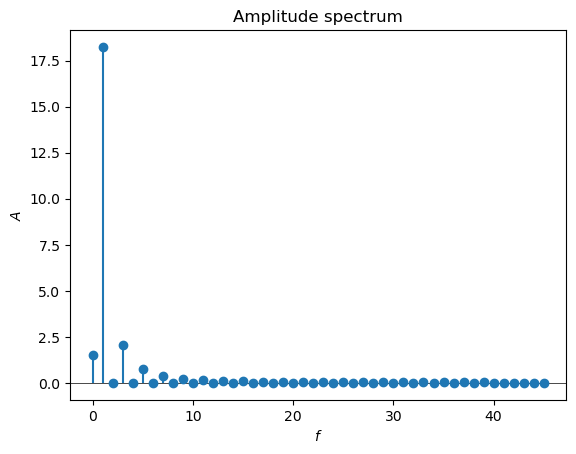

In [22]:
from math import hypot
spectrum = [hypot(ai, bi) for ai, bi in zip(a, b)]

plt.axhline(0.0, color='k', lw=0.5)
plt.stem(spectrum, basefmt='None')
plt.xlabel('$f$'); plt.ylabel('$A$')
plt.title('Amplitude spectrum')
plt.show()

### Exercises

**Exercise 4**

Below you find the average temperature in the city of Groningen across all months in a year (from: [Climates to travel](https://www.climatestotravel.com/climate/netherlands/groningen)).

| Month     | T [°C] |   | Month     | T [°C] |
| --------- | ------ | - | --------- | ------ |
| January   |  2.5   |   | July      | 17.5   |
| February  |  2.9   |   | August    | 17.2   |
| March     |  5.5   |   | September | 14.2   |
| April     |  8.9   |   | October   | 10.2   |
| May       | 12.4   |   | November  |  6.1   |
| June      | 15.1   |   | December  |  3.3   |

Fit a sinusoid through these data, and plot the fit together with the original data. Can you determine when, according to the fitted parameters from the sinusoidal model, the hottest day approximately occurs?

**Exercise 5**

Given is a wavelike signal of exactly one second duration that is sampled 100 times (i.e. once every centisecond). First, determine the Nyquist-frequency of this signal.

Next, generate 1 second of a sinusoidal signal with a frequency that is 90% *higher* than the Nyquist-frequency, sampled 100 times. Plot the signal as well as its amplitude spectrum.

The spectrum should show one clear peak. What is the frequency at which the peak in the spectrum occurs? How is this frequency related to the original frequency of the signal?

The phenomenon that frequencies above the Nyquis-frequency appear at other positions in the spectrum is called [aliasing](https://en.wikipedia.org/wiki/Aliasing).

**Exercise 6**

The following code loads information regarding the water level as measured at 10-minute intervals in Lauwersoog (Groningen, NL) over the past 4 weeks (from: [Rijkswaterstaat](https://rijkswaterstaatdata.nl)).

```python
import pandas as pd
url = 'https://waterinfo.rws.nl/api/Download/CSV?expertParameter=' + \
      'Waterhoogte%20Oppervlaktewater%20t.o.v.%20Normaal%20Amsterdams%20Peil%20in%20cm' + \
      '&locationSlug=Lauwersoog(LAUW)&timehorizon=-672,0'
tides = pd.read_csv(url, sep=';', header=0, usecols=[0, 1, 4],
                    names=['Date', 'Time', 'Water level [cm NAP]']).dropna()
```

From these data, using the Fourier transform, determine the strongest peak in the signal's spectrum; estimate the period of the tide in Lauwersoog using its frequency. Express your result in meaningful units.

**Exercise 7**

Read the documentation of the `numpy` function that computes the *real-valued* [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (rFFT) `fft.rfft()` with inverse `fft.irfft()`, and apply it to the previous sawtooth example data using the extra argument `norm='forward'`. The result will be one complex-valued array. Compare its contents to that of our lists of coefficients `a` and `b`. How are these related?

**Exercise 8**

The following code downloads an electrocardiographic (ECG) signal that was recorded at a sampling rate of 500 Hz in a [telehealth environment](https://en.wikipedia.org/wiki/Telehealth) from two electrodes held in the left and right hand (from: [Khamis et al., Harvard dataverse](https://doi.org/10.7910/DVN/QTG0EP)).

```python
import pandas as pd, io, requests
url = 'https://dataverse.harvard.edu/api/access/datafile/:' + \
      'persistentId?persistentId=doi:10.7910/DVN/QTG0EP/IW7ADN'
ecg = pd.read_csv(io.StringIO(requests.get(url).text),
                  usecols=[0], names=['Potential [mV]'])
```

Upon close visual inspection of the signal and its spectrum, the data can be seen to contain oscillations related to the heart beat, but also slow baseline drift (especially in the first half of the measurement) and a substantial artifact at 50 Hz caused by interference from [mains power](https://en.wikipedia.org/wiki/Utility_frequency).

Apply the Fourier transform to convert the signal into its spectrum, manually set the coefficients $a_i$ and $b_i$ for all frequencies that are substantially smaller than the heart beat frequency as well as the frequencies near the 50 Hz artifact equal to zero, and transform the obtained spectrum back into the time domain.

Plot the original signal alongside the filtered signal.

Note: use either your own functions, or the much [faster](https://en.wikipedia.org/wiki/Fast_Fourier_transform) `fft.rfft()` and `fft.irfft()` functions provided by numpy (see the previous exercise).

***